In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
res = os.listdir("d:/python/1029")
pfiles=[]
for ii in res:
    if ii.find(".DAT")>0:
        pfiles.append(ii)
print(pfiles)

['201801P.DAT', '201802P.DAT', '201803P.DAT', '201804P.DAT', '201805P.DAT', '201806P.DAT', '201807P.DAT', '201808P.DAT', '201809P.DAT', '201810P.DAT', '201811P.DAT', '201812P.DAT']


In [3]:
taiwan_x=[]
taiwan_y=[]
with open("taiwan.txt","r") as fp:
    res=fp.readlines()
for ii in res:
    tmp = ii.split()
    taiwan_x.append(float(tmp[0]))
    taiwan_y.append(float(tmp[1]))

In [4]:
def read_pfile(file):
    eq_lon=[]
    eq_lat=[]
    eq_mag=[]
    eq_date=[]
    eq_hour=[]
    eq_depth=[]
    with open(file,"r") as fp:
        res=fp.readlines()
    for ii in res:    
        lat = float(ii[18:20])+float(ii[20:25])/60.0
        eq_lat.append(lat)
        lon = float(ii[25:28])+float(ii[28:33])/60.0
        eq_lon.append(lon)    
        mag = float(ii[39:43])
        eq_mag.append(mag)
        dep = float(ii[33:39])
        eq_depth.append(dep)
    
        yr = int(ii[0:4])
        mo = int(ii[4:6])
        dy = int(ii[6:8])
        hr = int(ii[8:10])
        mn = int(ii[10:12])
        se = float(ii[12:18])
    
        eq_hour.append(hr)


    data = {"Hour":eq_hour,"Lon":eq_lon, "Lat":eq_lat, "Mag":eq_mag,"Dep":eq_depth }
    data = pd.DataFrame(data)
    return data

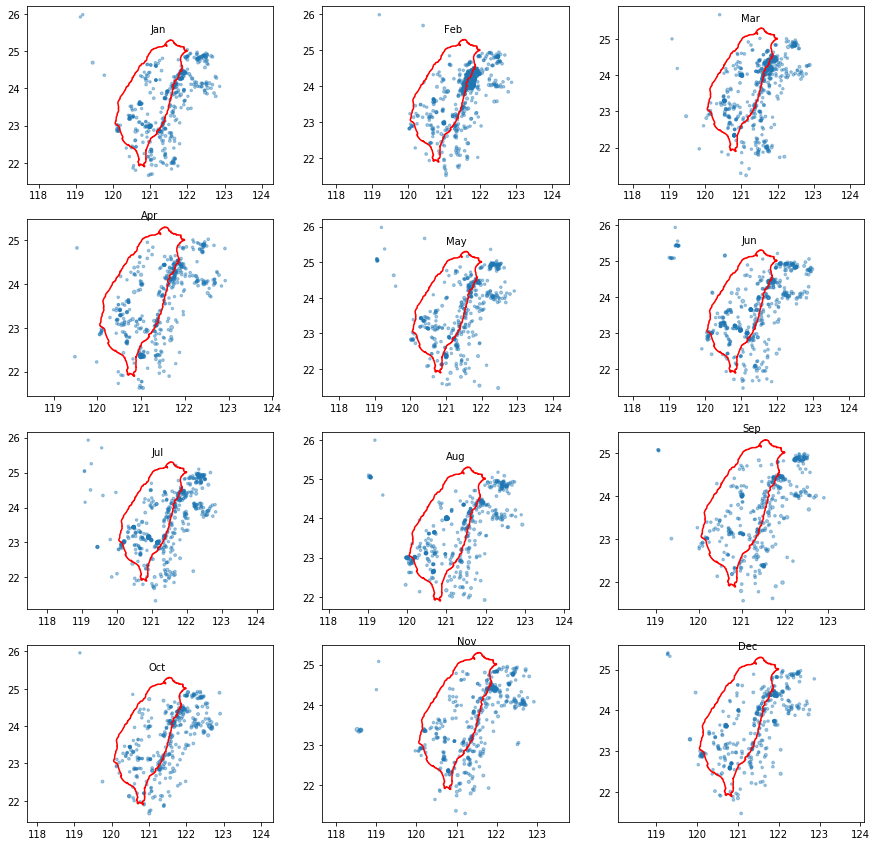

In [5]:
title_str = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
plt.figure(figsize=(15,15))

for i in range(0,12):
    data = read_pfile(pfiles[i])
    filter1 = data["Mag"] > 2
    filter2 = data["Dep"] < 40
    filter3 = filter1 & filter2
    lon=data[filter3]["Lon"]
    lat=data[filter3]["Lat"]  
    mag=data[filter3]["Mag"] 
    dep=data[filter3]["Dep"] 
    
    plt.subplot(4,3,i+1)
    plt.scatter(lon,lat,mag*3,alpha=0.4)
    plt.text(121,25.5,title_str[i])
    plt.plot(taiwan_x,taiwan_y,'r')
    plt.axis("equal")
plt.show()

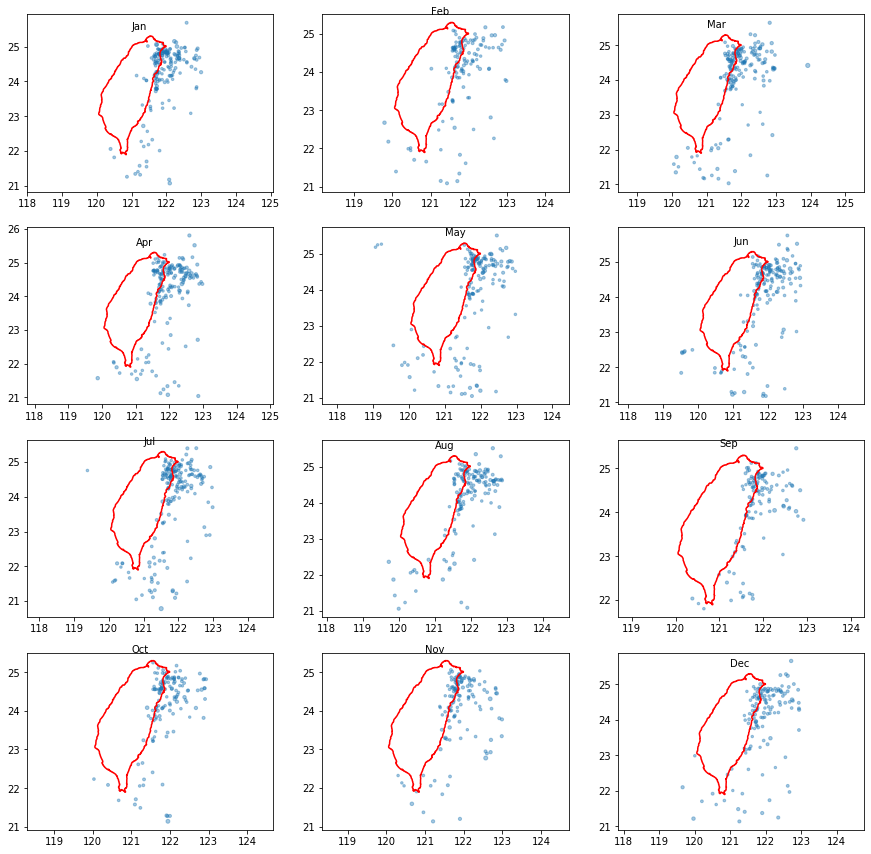

In [6]:
title_str = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
plt.figure(figsize=(15,15))

for i in range(0,12):
    data = read_pfile(pfiles[i])
    filter1 = data["Mag"] > 2.0
    filter2 = data["Dep"] > 40.00
    filter3 = filter1 & filter2
    lon=data[filter3]["Lon"]
    lat=data[filter3]["Lat"]  
    mag=data[filter3]["Mag"] 
    dep=data[filter3]["Dep"] 
    
    plt.subplot(4,3,i+1)
    plt.scatter(lon,lat,mag*3,alpha=0.4)
    plt.text(121,25.5,title_str[i])
    plt.plot(taiwan_x,taiwan_y,'r')
    plt.axis("equal")
plt.show()

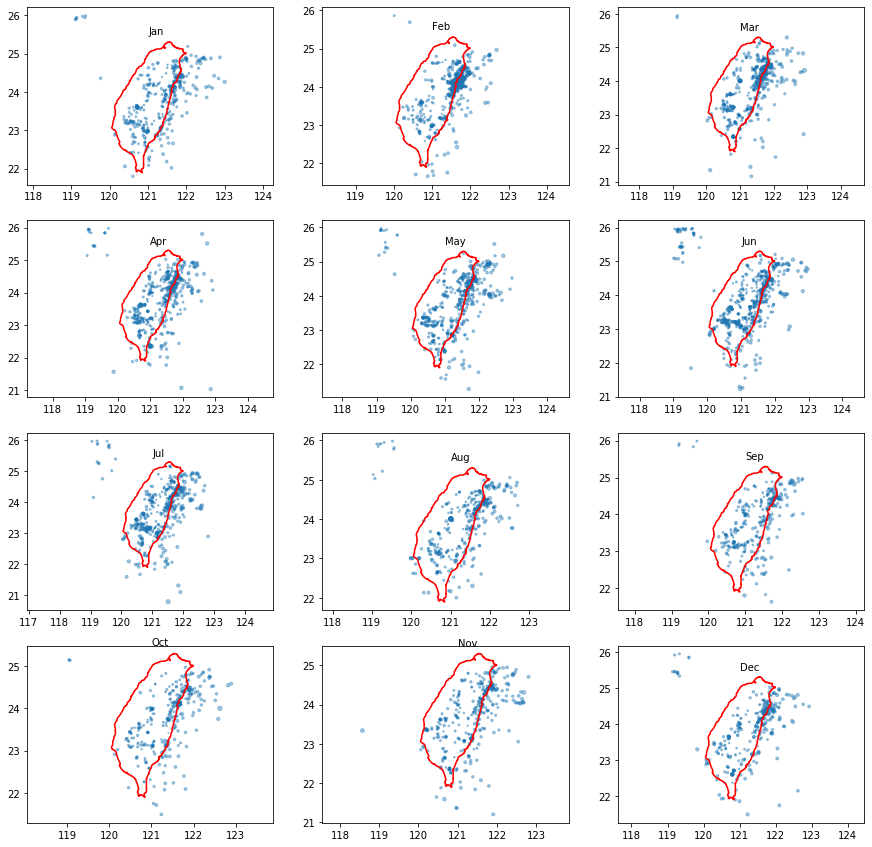

In [7]:
title_str = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
plt.figure(figsize=(15,15))

for i in range(0,12):
    data = read_pfile(pfiles[i])
    filter1 = data["Hour"] >= 0
    filter2 = data["Hour"] <= 4
    filter3 = filter1 & filter2
    lon=data[filter3]["Lon"]
    lat=data[filter3]["Lat"]  
    mag=data[filter3]["Mag"] 
    
    plt.subplot(4,3,i+1)
    plt.scatter(lon,lat,mag*3,alpha=0.4)
    plt.text(121,25.5,title_str[i])
    plt.plot(taiwan_x,taiwan_y,'r')
    plt.axis("equal")
plt.show()

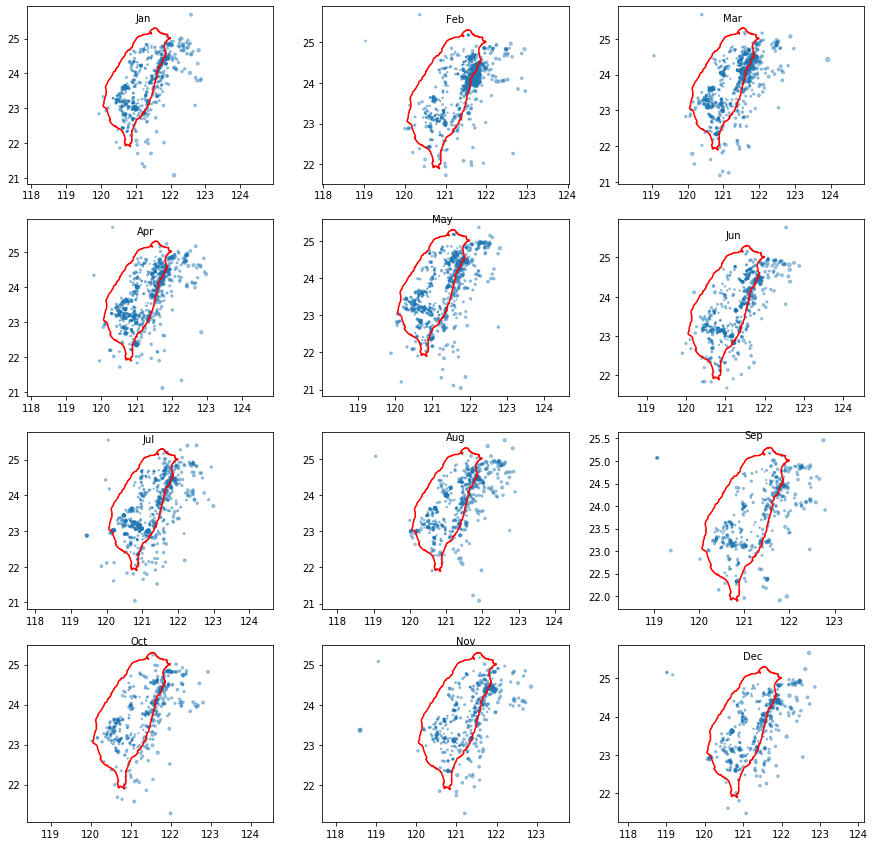

In [8]:
title_str = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
plt.figure(figsize=(15,15))

for i in range(0,12):
    data = read_pfile(pfiles[i])
    filter1 = data["Hour"] >= 12
    filter2 = data["Hour"] <= 16
    filter3 = filter1 & filter2 
    lon=data[filter3]["Lon"]
    lat=data[filter3]["Lat"]  
    mag=data[filter3]["Mag"] 
    
    plt.subplot(4,3,i+1)
    plt.scatter(lon,lat,mag*3,alpha=0.4)
    plt.text(121,25.5,title_str[i])
    plt.plot(taiwan_x,taiwan_y,'r')
    plt.axis("equal")
plt.show()